```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
!pip install transformers sentencepiece

In [ ]:
import torch, sentencepiece
from transformers import MarianMTModel, MarianTokenizer

# Diagram

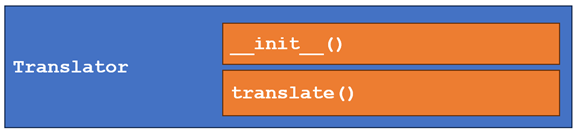

# Code

In [ ]:
class Translator:
    def __init__(self, source_lang, target_lang):
        model_name = f'Helsinki-NLP/opus-mt-{source_lang}-{target_lang}'
        self.model = MarianMTModel.from_pretrained(model_name)
        self.tokenizer = MarianTokenizer.from_pretrained(model_name)

    def translate(self, text):
        tokens = self.tokenizer.encode(text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
        translation_ids = self.model.generate(tokens)
        translation = self.tokenizer.decode(translation_ids[0], skip_special_tokens=True)
        return translation

In [ ]:
def main():
    source_lang = input("Enter source language (e.g., 'en' for English): ").strip().lower()
    target_lang = input(f"Enter target language (e.g., 'fr' for French): ").strip().lower()
    translator = Translator(source_lang, target_lang)

    while True:
        text_to_translate = input("\nEnter the text you want to translate (or type 'exit' to stop): ")

        if text_to_translate.lower() == 'exit':
            break

        translated_text = translator.translate(text_to_translate)
        print(f"\nTranslated text ({source_lang} to {target_lang}):\n{translated_text}")


# Execution

In [ ]:
main()